In [ ]:
#some useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, t
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.weightstats import tconfint_mean
from statsmodels.stats.multicomp import pairwise_tukeyhsd

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

ImportError: ignored

#Data Clean Up

In [ ]:
#load data
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
#change categorical variables to string type
df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'Occurrence_Category', 
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound']] = df[['Arrest_Month', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'Occurrence_Category', 
       'SearchReason_CauseInjury', 'SearchReason_AssistEscape', 
       'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence', 'ItemsFound']].astype('string')

In [ ]:
# check for missing values
missing_values = df.isnull().sum()

print(missing_values)

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
df = df.dropna(subset=['Perceived_Race', 'Age_group__at_arrest_', 'Occurrence_Category'])

In [ ]:
# count the occurrences of each category
occurrence_count = df['Occurrence_Category'].value_counts()
# get the top 5 categories
top_categories = occurrence_count.head(5)

print(top_categories)

Assault                                   7724
Assault & Other crimes against persons    7234
Robbery & Theft                           4580
Warrant                                   4377
FTA/FTC/Compliance Check/Parollee         4246
Name: Occurrence_Category, dtype: Int64


In [ ]:
# create a boolean mask to select rows with top categories
mask = df['Occurrence_Category'].isin(top_categories.index)

# select only rows with top categories and drop others
df = df.loc[mask]

# check the number of rows
df.nunique()

Arrest_Year                            2
Arrest_Month                           4
EventID                            26706
ArrestID                           27995
PersonID                           19395
Perceived_Race                         8
Sex                                    3
Age_group__at_arrest_                  9
Youth_at_arrest__under_18_years        3
ArrestLocDiv                          18
StripSearch                            2
Booked                                 2
Occurrence_Category                    5
Actions_at_arrest___Concealed_i        2
Actions_at_arrest___Combative__        2
Actions_at_arrest___Resisted__d        2
Actions_at_arrest___Mental_inst        2
Actions_at_arrest___Assaulted_o        2
Actions_at_arrest___Cooperative        2
SearchReason_CauseInjury               2
SearchReason_AssistEscape              2
SearchReason_PossessWeapons            2
SearchReason_PossessEvidence           2
ItemsFound                             2
ObjectId        

In [ ]:
# Change age into numerical number
df['Age_numerical'] = df['Age_group__at_arrest_'].apply(lambda x: 
    17 if x == 'Aged 17 years and younger' else
    21 if x == 'Aged 18 to 24 years' else
    30 if x == 'Aged 25 to 34 years' else
    40 if x == 'Aged 35 to 44 years' else
    50 if x == 'Aged 45 to 54 years' else
    60 if x == 'Aged 55 to 64 years' else
    65 if x == 'Aged 65 years and older' or x == 'Aged 65 and older' else
    None)

In [ ]:
# Replace gender data with numerical values
df['Gender'] = df['Sex'].replace({'M': 1, 'F': 2, 'U': 0})

In [ ]:
df.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,Age_numerical,Gender
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,1,40.0,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,2,40.0,1
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,3,40.0,1
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,5,30.0,1
5,2021,Apr-June,1019145,6060688.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,42,...,0,1,<NA>,<NA>,<NA>,<NA>,<NA>,6,30.0,1


In [ ]:
#Setting the top 5 occurrence categories
top_categories = df['Occurrence_Category'].value_counts().nlargest(5).index.tolist()
df_top_categories = df[df['Occurrence_Category'].isin(top_categories)]

#EDA

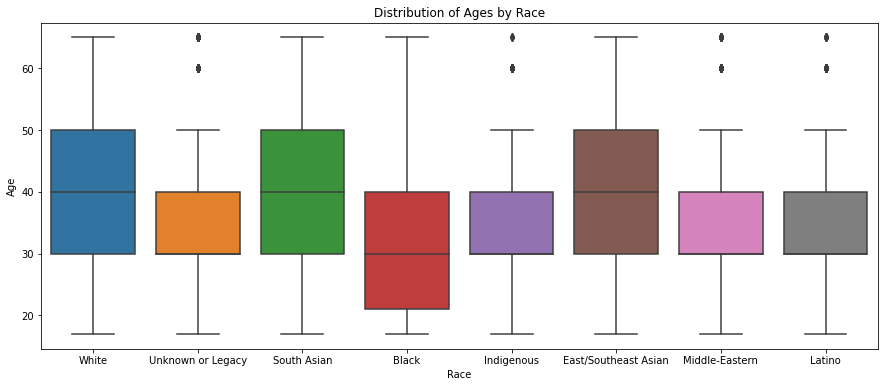

In [ ]:
#Visualization of age and race distribution
plt.figure(figsize=(15, 6))
df = df.dropna(subset=["Age_numerical", "Perceived_Race"])

sns.boxplot(x="Perceived_Race", y="Age_numerical", data=df)
plt.title("Distribution of Ages by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()

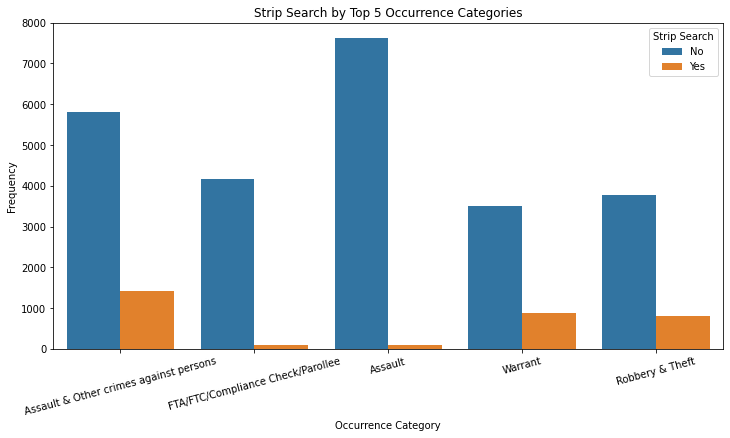

In [ ]:
#Visualization of whether strip searches were conducted in top 5 categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Occurrence_Category', hue='StripSearch', data=df_top_categories)
plt.title('Strip Search by Top 5 Occurrence Categories')
plt.xlabel('Occurrence Category')
plt.ylabel('Frequency')
plt.xticks(rotation=15)
plt.legend(title='Strip Search', labels=['No', 'Yes'])
plt.show()
# Change stripsearch legend from 0 and 1 to Yes and No

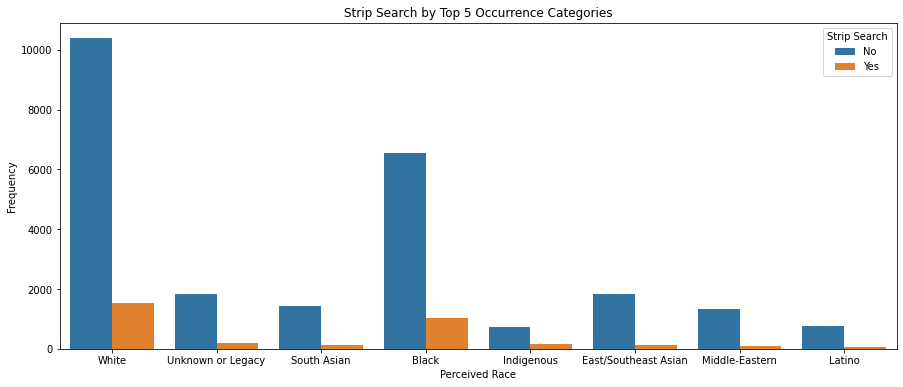

In [ ]:
#Visualization of strip searches based on perceived race
plt.figure(figsize=(15, 6))
sns.countplot(x='Perceived_Race', hue='StripSearch', data=df_top_categories)
plt.title('Strip Search by Top 5 Occurrence Categories')
plt.xlabel('Perceived Race')
plt.ylabel('Frequency')
plt.legend(title='Strip Search', labels=['No', 'Yes'])
plt.show()

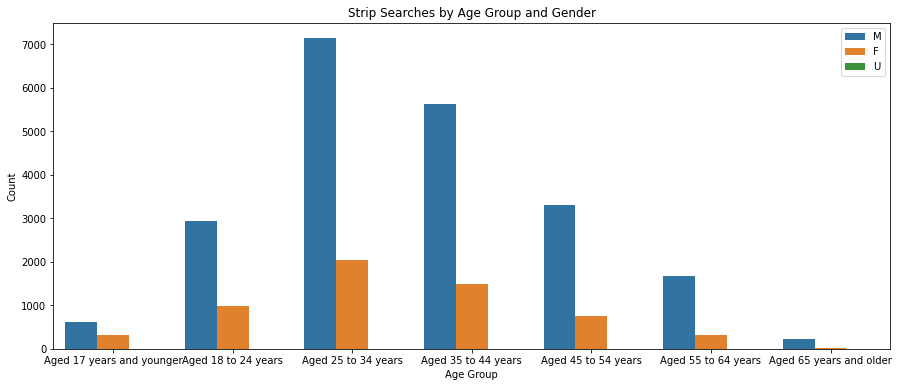

In [ ]:
#Visualization of strip searches based on Age_group and Sex
plt.figure(figsize=(15, 6))
age_categories = ["Aged 17 years and younger", "Aged 18 to 24 years", "Aged 25 to 34 years", 
                  "Aged 35 to 44 years", "Aged 45 to 54 years", "Aged 55 to 64 years", 
                  "Aged 65 years and older"]
df["Age_group__at_arrest_"] = pd.Categorical(df["Age_group__at_arrest_"], categories=age_categories, ordered=True)

sns.countplot(x="Age_group__at_arrest_", hue="Sex", data=df)
plt.title("Strip Searches by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

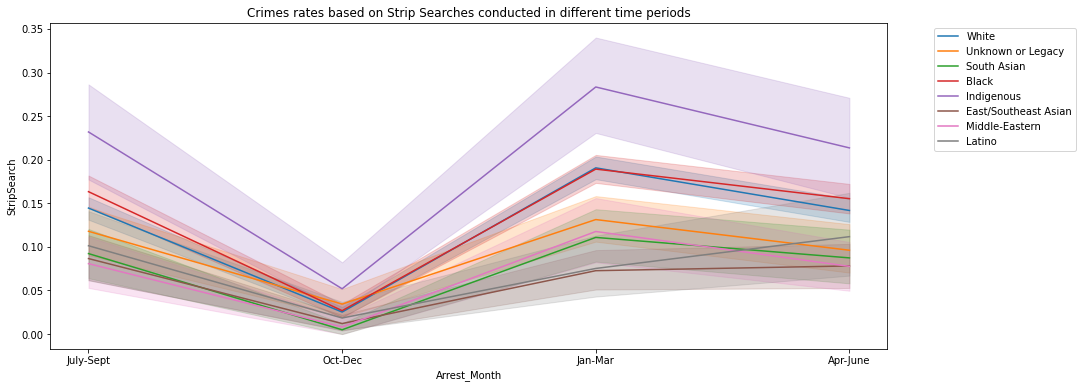

In [ ]:
#Visualization of Crime rate trends throughout the year outlined by different races
plt.figure(figsize=(15, 6))
plt.title('Crimes rates based on Strip Searches conducted in different time periods')
sns.lineplot(x='Arrest_Month', y='StripSearch', hue='Perceived_Race', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

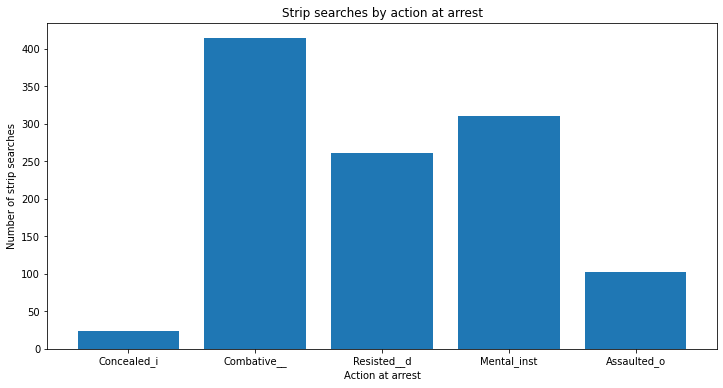

In [ ]:
actions = [
    "Concealed_i",
    "Combative__",
    "Resisted__d",
    "Mental_inst",
    "Assaulted_o"
]

counts = [df[df[f"Actions_at_arrest___{action}"] == 1]["StripSearch"].sum() for action in actions]

plt.figure(figsize=(12, 6))
plt.bar(actions, counts)
plt.xlabel("Action at arrest")
plt.ylabel("Number of strip searches")
plt.title("Strip searches by action at arrest")
plt.show()

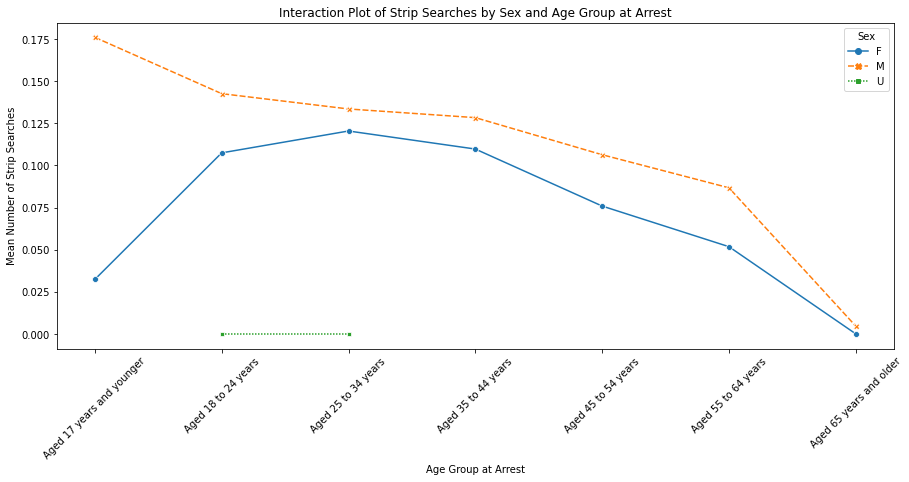

In [ ]:
#Interaction Plot of Strip Searches by Sex and Age Group at Arrest
grouped = df.groupby(['Sex', 'Age_group__at_arrest_']).mean()['StripSearch'].reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=grouped, x='Age_group__at_arrest_', y='StripSearch', hue='Sex', style='Sex', markers=True)
plt.title('Interaction Plot of Strip Searches by Sex and Age Group at Arrest')
plt.xlabel('Age Group at Arrest')
plt.ylabel('Mean Number of Strip Searches')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Use t-test to compare the mean of age if they were strip searched
# select the columns of interest
subset = df[['StripSearch', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_strip_search = subset.groupby('StripSearch')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_strip_search[1], age_strip_search[0])

# calculate means and CI
mean_strip_searched = np.mean(age_strip_search[1])
mean_not_strip_searched = np.mean(age_strip_search[0])
std_strip_searched = np.std(age_strip_search[1], ddof=1)
std_not_strip_searched = np.std(age_strip_search[0], ddof=1)
n_strip_searched = len(age_strip_search[1])
n_not_strip_searched = len(age_strip_search[0])
ci_low_strip_searched, ci_high_strip_searched = t.interval(0.95, n_strip_searched-1, loc=mean_strip_searched, scale=std_strip_searched)
ci_low_not_strip_searched, ci_high_not_strip_searched = t.interval(0.95, n_not_strip_searched-1, loc=mean_not_strip_searched, scale=std_not_strip_searched)

# print the results
print('T-test for Age group by Strip Search: t =', t_age, ', p =', p_age)
print('Mean age for strip searched:', mean_strip_searched, ', 95% CI:', ci_low_strip_searched, ci_high_strip_searched)
print('Mean age for not strip searched:', mean_not_strip_searched, ', 95% CI:', ci_low_not_strip_searched, ci_high_not_strip_searched)

T-test for Age group by Strip Search: t = -9.171294098626362 , p = 4.9876370408491215e-20
Mean age for strip searched: 34.85158371040724 , 95% CI: 13.35038780577559 56.35277961503889
Mean age for not strip searched: 36.90573820706555 , 95% CI: 12.898704008796276 60.912772405334835


In [ ]:
# Use t-test to compare the mean of age if they had actions at arrest
# combine all types of actions at arrest into one variable
df['Actions_at_arrest'] = df['Actions_at_arrest___Concealed_i'] | df['Actions_at_arrest___Combative__'] | df['Actions_at_arrest___Resisted__d'] | df['Actions_at_arrest___Mental_inst'] | df['Actions_at_arrest___Assaulted_o']

# select the columns of interest
subset = df[['Actions_at_arrest', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for actions at arrest
age_actions_at_arrest = subset.groupby('Actions_at_arrest')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_actions_at_arrest[1], age_actions_at_arrest[0])

# calculate means and CI
mean_yes = np.mean(age_actions_at_arrest[1])
mean_no = np.mean(age_actions_at_arrest[0])
std_yes = np.std(age_actions_at_arrest[1], ddof=1)
std_no = np.std(age_actions_at_arrest[0], ddof=1)
n_yes = len(age_actions_at_arrest[1])
n_no = len(age_actions_at_arrest[0])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by Actions at Arrest: t =', t_age, ', p =', p_age)
print('Mean age for Actions at Arrest:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for no Actions at Arrest:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by Actions at Arrest: t = -4.109238884187431 , p = 3.9810257402077734e-05
Mean age for Actions at Arrest: 35.77198581560284 , 95% CI: 14.043874367244428 57.50009726396125
Mean age for no Actions at Arrest: 36.7611289031225 , 95% CI: 12.792712794532214 60.72954501171278


In [ ]:
# Use t-test to compare the mean of age committing a crime if they are male or female
# select the columns of interest
subset = df[['Gender', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_gender = subset.groupby('Gender')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_gender[1], age_gender[2])

# calculate means and CI
mean_yes = np.mean(age_gender[1])
mean_no = np.mean(age_gender[2])
std_yes = np.std(age_gender[1], ddof=1)
std_no = np.std(age_gender[2], ddof=1)
n_yes = len(age_gender[1])
n_no = len(age_gender[2])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group committing a crime by gender: t =', t_age, ', p =', p_age)
print('Mean age for male:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for female:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group committing a crime by gender: t = 12.064157566415954 , p = 1.9799046340425986e-33
Mean age for male: 37.1215459469384 , 95% CI: 13.265803834445265 60.97728805943153
Mean age for female: 34.99650582362729 , 95% CI: 11.884964001437108 58.108047645817464


In [ ]:
# Use t-test to compare the mean of age in if they were booked
# select the columns of interest
subset = df[['Booked', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_booked = subset.groupby('Booked')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_booked[0], age_booked[1])

# calculate means and CI
mean_yes = np.mean(age_booked[1])
mean_no = np.mean(age_booked[0])
std_yes = np.std(age_booked[1], ddof=1)
std_no = np.std(age_booked[0], ddof=1)
n_yes = len(age_booked[1])
n_no = len(age_booked[0])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by booked: t =', t_age, ', p =', p_age)
print('Mean age for booked:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for not booked:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by booked: t = 3.5413068168780226 , p = 0.0003988014657899501
Mean age for booked: 35.77198581560284 , 95% CI: 14.043874367244428 57.50009726396125
Mean age for not booked: 36.7611289031225 , 95% CI: 12.792712794532214 60.72954501171278


In [ ]:
# Use t-test to compare the mean of age in different year
# select the columns of interest
subset = df[['Arrest_Year', 'Age_numerical']]

# drop missing values
subset = subset.dropna()

# perform t-test for age group by strip search
age_year = subset.groupby('Arrest_Year')['Age_numerical'].apply(list)
t_age, p_age = ttest_ind(age_year[2020], age_year[2021])

# calculate means and CI
mean_yes = np.mean(age_year[2021])
mean_no = np.mean(age_year[2020])
std_yes = np.std(age_year[2021], ddof=1)
std_no = np.std(age_year[2020], ddof=1)
n_yes = len(age_year[2021])
n_no = len(age_year[2020])
ci_low_yes, ci_high_yes = t.interval(0.95, n_yes-1, loc=mean_yes, scale=std_yes)
ci_low_no, ci_high_no = t.interval(0.95, n_no-1, loc=mean_no, scale=std_no)

# print the results
print('T-test for Age group by year: t =', t_age, ', p =', p_age)
print('Mean age for 2021:', mean_yes, ', 95% CI:', ci_low_yes, ci_high_yes)
print('Mean age for 2020:', mean_no, ', 95% CI:', ci_low_no, ci_high_no)

T-test for Age group by year: t = -8.52435352889878 , p = 1.6133457462140682e-17
Mean age for 2021: 37.35253661299458 , 95% CI: 14.922051320729476 59.78302190525967
Mean age for 2020: 36.107117414675216 , 95% CI: 11.391000438645563 60.82323439070487


#Hypothesis Test

In [ ]:
#Research Question 1 Hypothesis 
#H0: There is no significant difference in the number of strip searches conducted by the Toronto Police based on perceived race of "White" and "Black."
#HA: The number of strip searches conducted by the Toronto Police based on perceived race of "White" and "Black" is significantly different.


In [ ]:
# select subset of data with only 'White' and 'Black' in Perceived_Race
subset = df.loc[df['Perceived_Race'].isin(['White', 'Black'])]

# perform ANOVA for strip search between 'White' and 'Black'
strip_search_race = subset.groupby('Perceived_Race')['StripSearch'].apply(list)
f_race, p_anova_race = f_oneway(*[strip_search_race[i] for i in range(2)])

# calculate means and CI
mean_white_strip_searched = np.mean(strip_search_race['White'])
mean_black_strip_searched = np.mean(strip_search_race['Black'])
std_white_strip_searched = np.std(strip_search_race['White'])
std_black_strip_searched = np.std(strip_search_race['Black'])
n_white_strip_searched = len(strip_search_race['White'])
n_black_strip_searched = len(strip_search_race['Black'])
ci_low_white_strip_searched, ci_high_white_strip_searched = t.interval(0.95, n_white_strip_searched-1, loc=mean_white_strip_searched, scale=std_white_strip_searched)
ci_low_black_strip_searched, ci_high_black_strip_searched = t.interval(0.95, n_black_strip_searched-1, loc=mean_black_strip_searched, scale=std_black_strip_searched)

# print the results
print('ANOVA for strip search between White and Black: F =', f_race, ', p =', p_anova_race)
print('Mean strip search for White:', mean_white_strip_searched, ', 95% CI:', ci_low_white_strip_searched, ci_high_white_strip_searched)
print('Mean strip search for Black:', mean_black_strip_searched, ', 95% CI:', ci_low_black_strip_searched, ci_high_black_strip_searched)

ANOVA for strip search between White and Black: F = 2.5529318307001247 , p = 0.11010622532078089
Mean strip search for White: 0.12945257636009816 , 95% CI: -0.5285750674465608 0.7874802201667572
Mean strip search for Black: 0.13747976254722072 , 95% CI: -0.5375502138198446 0.812509738914286


In [ ]:
#Tukey_hsd
df= df.dropna(subset=["Perceived_Race"])
tukey_hsd = pairwise_tukeyhsd(endog = df["StripSearch"], groups= df['Perceived_Race'], alpha = 0.05)
print(tukey_hsd)

In [ ]:
#Research Question 2 Hypothesis 
#H0: The mean number of strip searches conducted by the Toronto Police is the same across all gender and age groups of suspects.
#HA: The mean number of strip searches conducted by the Toronto Police varies across at least one gender or age group of suspects.

In [ ]:
# filter relevant columns
subset = df[['Age_numerical', 'Gender', 'StripSearch']]

# drop missing values
subset = subset.dropna()

# perform two-way ANOVA
model = ols('StripSearch ~ C(Age_numerical) + C(Gender) + C(Age_numerical):C(Gender)', data=subset).fit()
table = sm.stats.anova_lm(model, typ=2)

# print the results
print(table)

# Calculate means and CI
means = subset.groupby(['Gender', 'Age_numerical'])['StripSearch'].mean()
ci = subset.groupby(['Gender', 'Age_numerical'])['StripSearch'].apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=x.mean(), scale=stats.sem(x)))
print(means)
print(ci)

                                 sum_sq       df          F        PR(>F)
C(Age_numerical)               4.044695      6.0   6.456593  8.138397e-07
C(Gender)                      6.691178      2.0  32.043613  1.257943e-14
C(Age_numerical):C(Gender)    12.083348     12.0   9.644394  4.831080e-19
Residual                    2900.853996  27784.0        NaN           NaN
Gender  Age_numerical
0       21.0             0.000000
        30.0             0.000000
1       17.0             0.176090
        21.0             0.142663
        30.0             0.133576
        40.0             0.128424
        50.0             0.106396
        60.0             0.086750
        65.0             0.020661
2       17.0             0.032362
        21.0             0.107505
        30.0             0.120488
        40.0             0.109772
        50.0             0.075916
        60.0             0.051780
        65.0             0.030612
Name: StripSearch, dtype: float64
Gender  Age_numerical
0       

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
#Research Question 3 Hypothesis 
#H0: The type of action taken at arrest does not affect the number of strip searches conducted by the Toronto Police. 
#HA: The number of strip searches conducted by the Toronto Police varies according to the type of action taken at arrest.

In [ ]:
# combine all types of actions at arrest into one variable
df['Actions_at_arrest'] = df['Actions_at_arrest___Concealed_i'] | df['Actions_at_arrest___Combative__'] | df['Actions_at_arrest___Resisted__d'] | df['Actions_at_arrest___Mental_inst'] | df['Actions_at_arrest___Assaulted_o']

subset = df[['Actions_at_arrest', 'StripSearch']]

# drop missing values
subset = subset.dropna()

# perform ANOVA for actions at arrest
f_action, p_anova_action = f_oneway(subset['Actions_at_arrest'],subset['StripSearch'])

# Calculate means and CI
means = subset.groupby(['Actions_at_arrest'])['StripSearch'].mean()
ci_low, ci_high = subset.groupby(['Actions_at_arrest'])['StripSearch'].apply(lambda x: sm.stats.DescrStatsW(x).tconfint_mean())

print('ANOVA for Actions at Arrest: F =', f_action, ', p =', p_anova_action)
print('Means:', means)
print('CI Lower Bound:', ci_low)
print('CI Upper Bound:', ci_high)

ANOVA for Actions at Arrest: F = 44.9270377964714 , p = 2.0646060310454246e-11
Means: Actions_at_arrest
0    0.102842
1    0.264539
Name: StripSearch, dtype: float64
CI Lower Bound: (0.09907521980609334, 0.10660932783201714)
CI Upper Bound: (0.24824935752119853, 0.2808286566631986)
